In [1]:
import pandas as pd
import os

In [2]:
# List all files in the 'Mel' and 'Nevus' folders
mel_files = [f for f in os.listdir('isic19_20/mel/') if f.endswith('.jpg') or f.endswith('.jpg')]
nevus_files = [f for f in os.listdir('isic19_20/nevus/') if f.endswith('.jpg') or f.endswith('.jpg')]

In [3]:
# Add full path to filenames
mel_files = ['isic19_20/mel/' + f for f in mel_files]
nevus_files = ['isic19_20/nevus/' + f for f in nevus_files]

# Create lists for the DataFrame
filenames = mel_files + nevus_files
labels = [0] * len(mel_files) + [1] * len(nevus_files)

# Create the DataFrame
df = pd.DataFrame({
    'filename': filenames,
    'label': labels
})

# Shuffle the DataFrame
df = df.sample(frac=1).reset_index(drop=True)

In [4]:
df

filename  label
0        isic19_20/mel/ISIC_0060399.jpg      0
1      isic19_20/nevus/ISIC_1135485.jpg      1
2        isic19_20/mel/ISIC_0069595.jpg      0
3      isic19_20/nevus/ISIC_8516631.jpg      1
4        isic19_20/mel/ISIC_0072287.jpg      0
...                                 ...    ...
11444  isic19_20/nevus/ISIC_8022913.jpg      1
11445  isic19_20/nevus/ISIC_6272249.jpg      1
11446    isic19_20/mel/ISIC_0061057.jpg      0
11447    isic19_20/mel/ISIC_0054459.jpg      0
11448    isic19_20/mel/ISIC_0026475.jpg      0

[11449 rows x 2 columns]

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

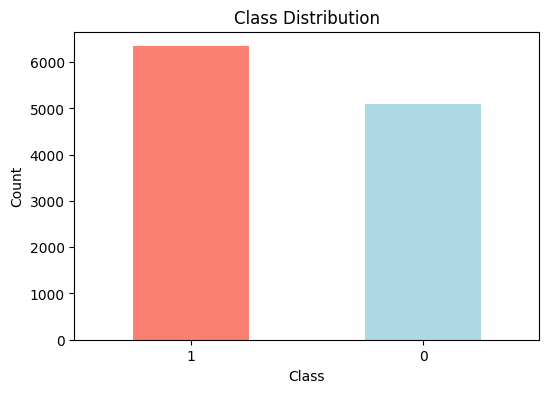

In [6]:
# Plotting the class distribution
plt.figure(figsize=(6, 4))
df['label'].value_counts().plot(kind='bar', color=['salmon', 'lightblue'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


In [7]:
mel_extract_path = 'isic19_20/mel/'
nevus_extract_path = 'isic19_20/nevus/'

In [9]:
from PIL import Image
import numpy as np

# Function to get dimensions of an image
def get_image_dimensions(image_path):
    with Image.open(image_path) as img:
        return img.size  # (width, height)

# Get dimensions of a few sample images from each class
sample_mel_dimensions = [get_image_dimensions(os.path.join( f)) for f in mel_files[:5]]
sample_nevus_dimensions = [get_image_dimensions(os.path.join( f)) for f in nevus_files[:5]]

sample_mel_dimensions

[(3264, 2448), (1024, 1024), (4288, 2848), (1024, 1024), (1024, 1024)]

In [10]:
 sample_nevus_dimensions

[(1872, 1053), (1872, 1053), (3264, 2448), (6000, 4000), (1872, 1053)]

In [11]:
mel_extract_path = 'isic19_20/mel/'
nevus_extract_path = 'isic19_20/nevus/'

In [15]:
os.path.join(mel_files[0])

'isic19_20/mel/ISIC_7927525.jpg'

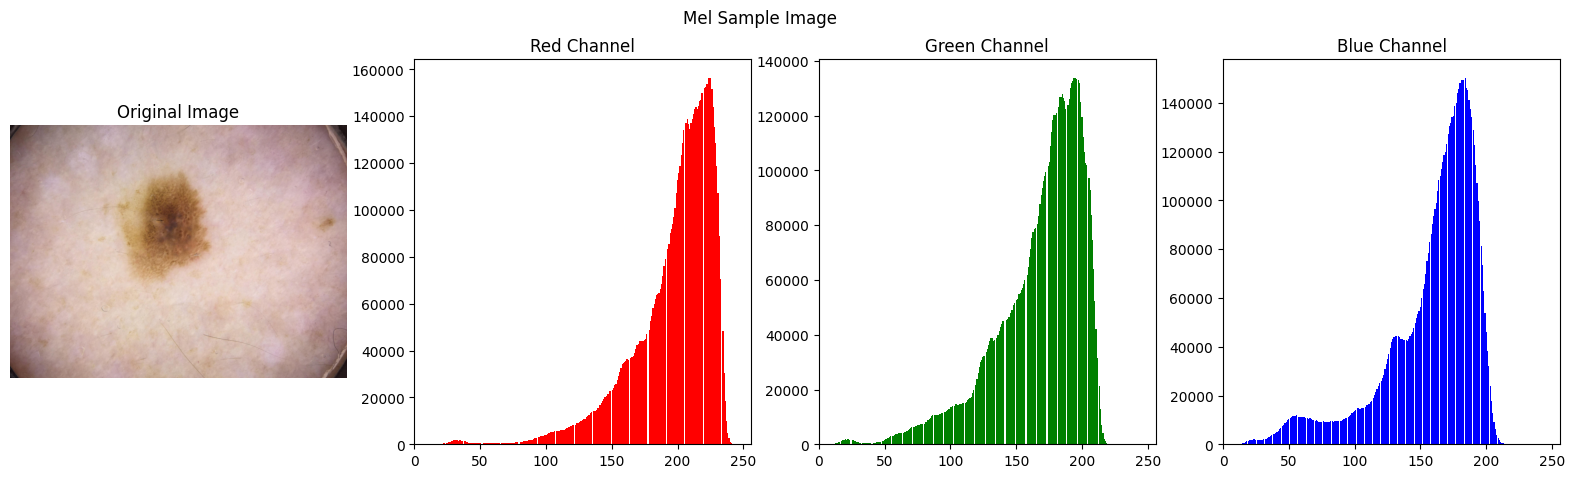

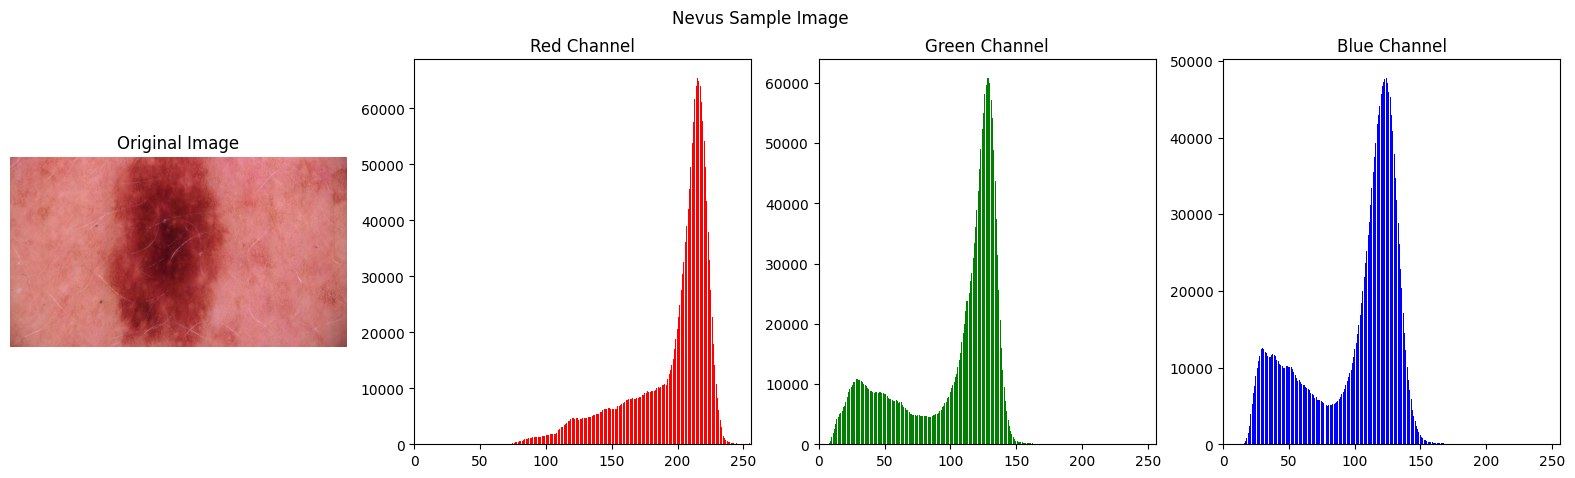

In [16]:
import cv2

# Function to plot color distribution of an image
def plot_color_distribution(image_path, title):
    # Read the image
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
    
    # Create subplots
    fig, axs = plt.subplots(1, 4, figsize=(20, 5))
    
    # Plot original image
    axs[0].imshow(img)
    axs[0].set_title('Original Image')
    axs[0].axis('off')
    
    # Plot color channels
    colors = ['Red', 'Green', 'Blue']
    for i, color in enumerate(colors):
        axs[i+1].hist(img[..., i].ravel(), bins=256, color=color.lower())
        axs[i+1].set_title(f'{color} Channel')
        axs[i+1].set_xlim([0, 256])
    
    plt.suptitle(title)
    plt.show()

# Plot color distribution for one sample image from each class
plot_color_distribution(os.path.join(mel_files[0]), 'Mel Sample Image')
plot_color_distribution(os.path.join(nevus_files[0]), 'Nevus Sample Image')


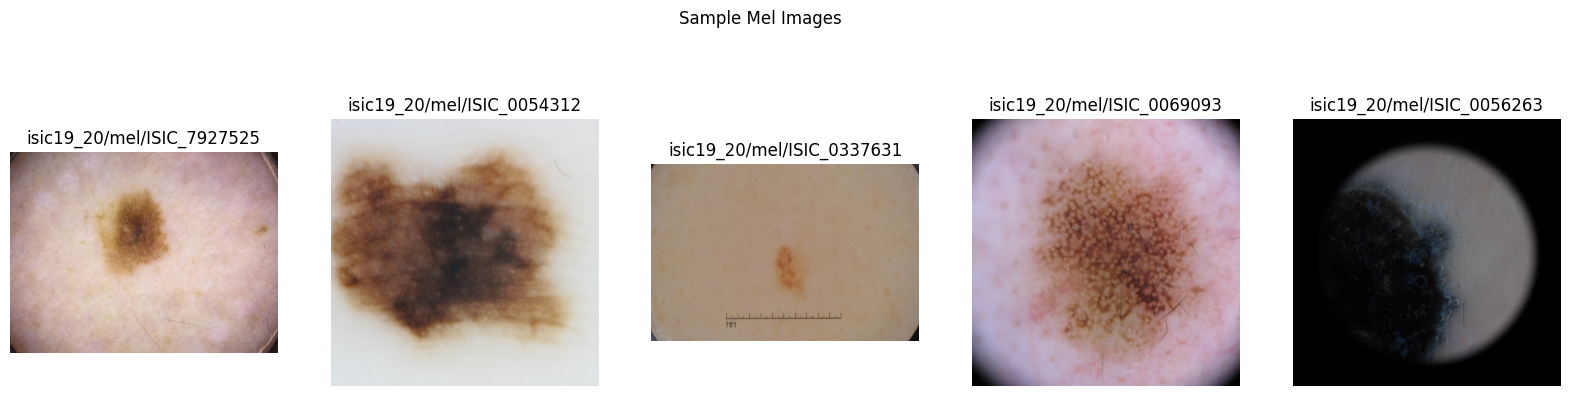

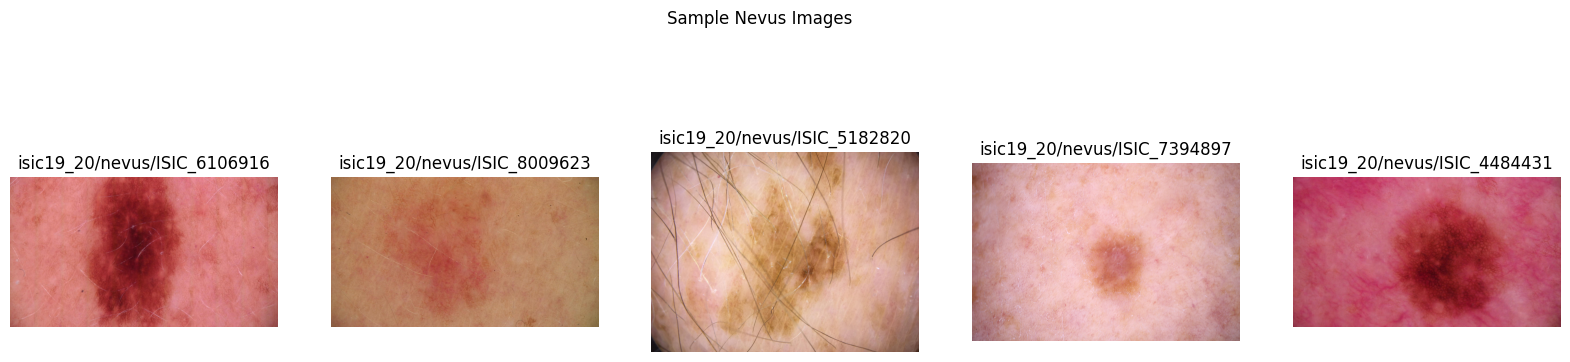

In [18]:
# Function to display sample images from a given folder
def display_sample_images( file_list, title, n=5):
    plt.figure(figsize=(20, 5))
    
    for i, file_name in enumerate(file_list[:n]):
        img_path = os.path.join(file_name)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
        
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(file_name.split('.')[0])
    
    plt.suptitle(title)
    plt.show()

# Display sample images from each class
display_sample_images( mel_files, 'Sample Mel Images')
display_sample_images( nevus_files, 'Sample Nevus Images')


# Texture Analysis

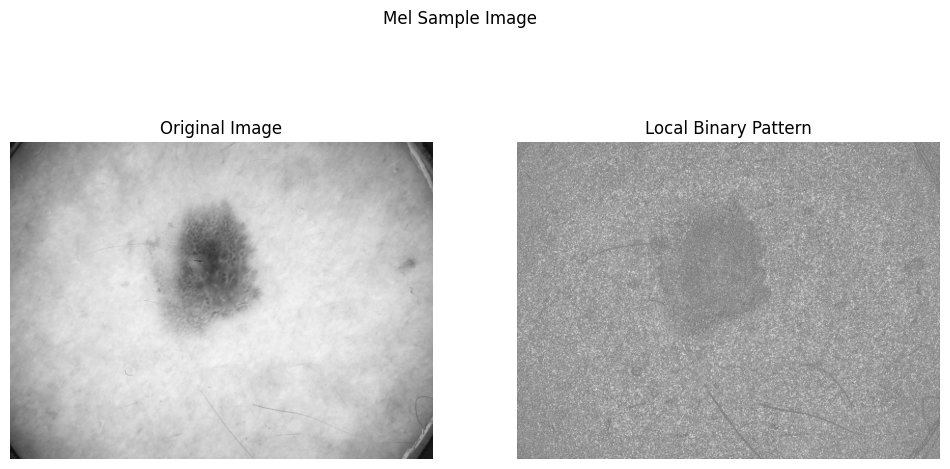

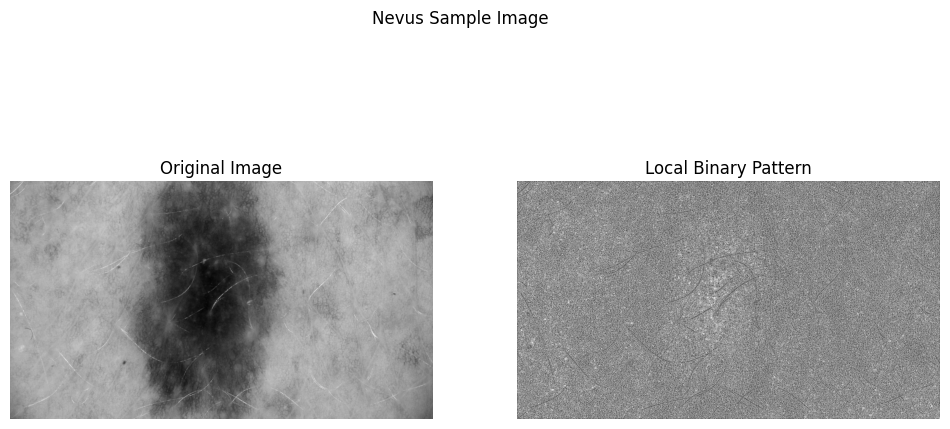

In [19]:
from skimage.feature import local_binary_pattern

# Function to calculate and plot Local Binary Pattern of an image
def plot_lbp(image_path, title):
    # Read the image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Compute LBP
    radius = 1
    n_points = 8 * radius
    lbp_img = local_binary_pattern(img, n_points, radius, method='uniform')
    
    # Create subplots
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    
    # Plot original image
    axs[0].imshow(img, cmap='gray')
    axs[0].set_title('Original Image')
    axs[0].axis('off')
    
    # Plot LBP
    axs[1].imshow(lbp_img, cmap='gray')
    axs[1].set_title('Local Binary Pattern')
    axs[1].axis('off')
    
    plt.suptitle(title)
    plt.show()

# Plot LBP for one sample image from each class
plot_lbp(os.path.join( mel_files[0]), 'Mel Sample Image')
plot_lbp(os.path.join( nevus_files[0]), 'Nevus Sample Image')


# Class-wise Statistical Analysis

In [25]:
nevus_files[0]

'isic19_20/nevus/ISIC_6106916.jpg'

In [27]:
import numpy as np
from scipy.stats import skew

# Assuming img is a NumPy array of shape (height, width, 3)
mean = np.mean(img, axis=(0, 1))
std_dev = np.std(img, axis=(0, 1))
skewness = skew(img.reshape(-1, 3), axis=0)

print(f"Mean: {mean}, Standard Deviation: {std_dev}, Skewness: {skewness}")


NameError: name 'img' is not defined

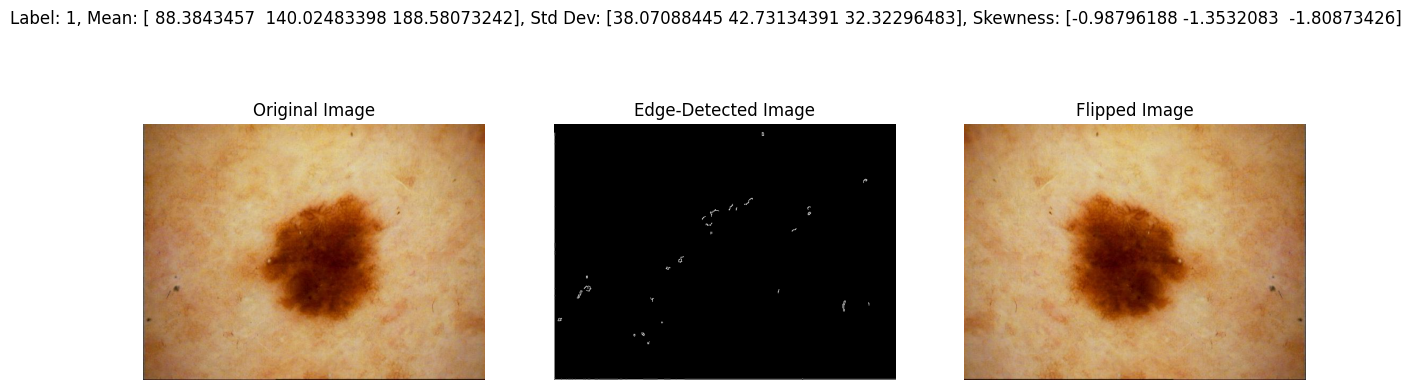

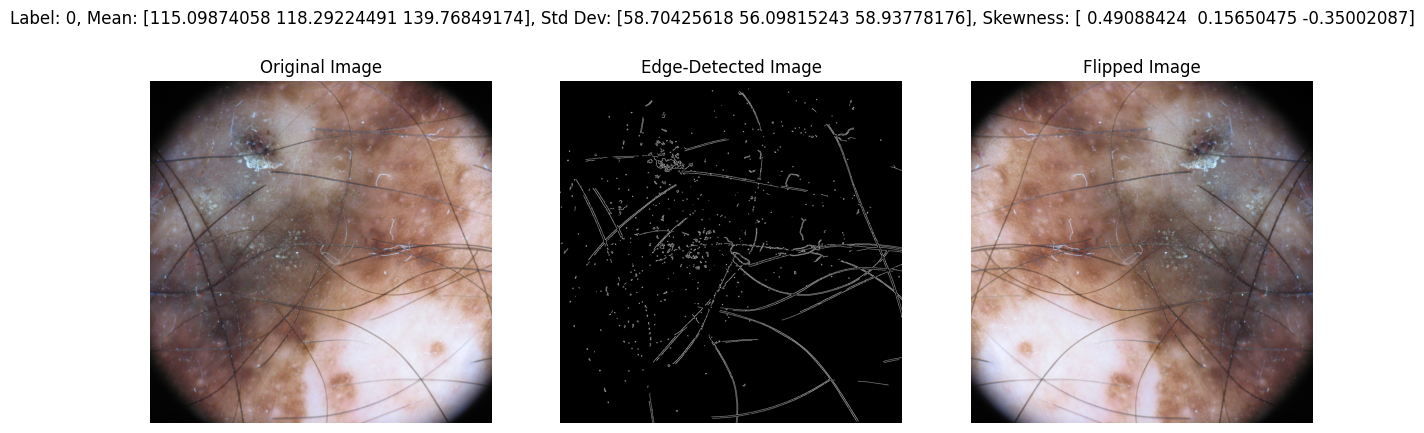

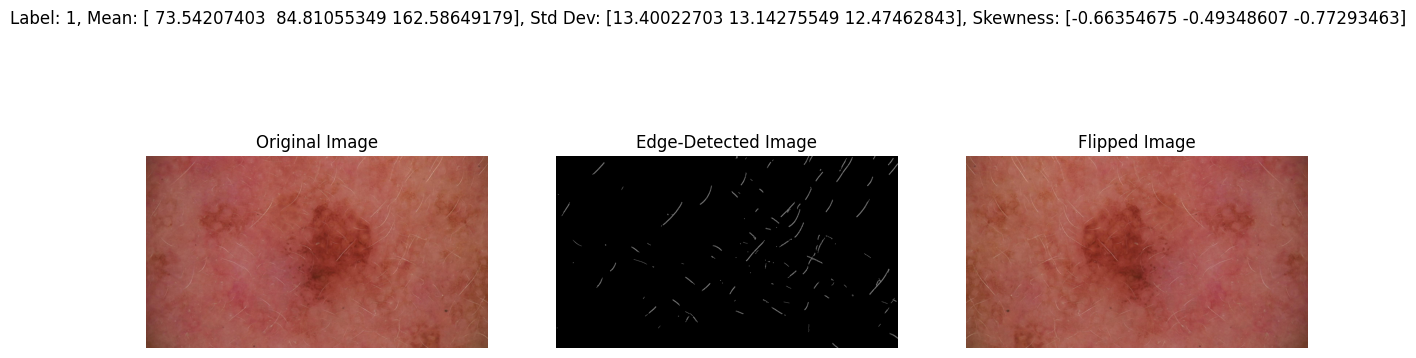

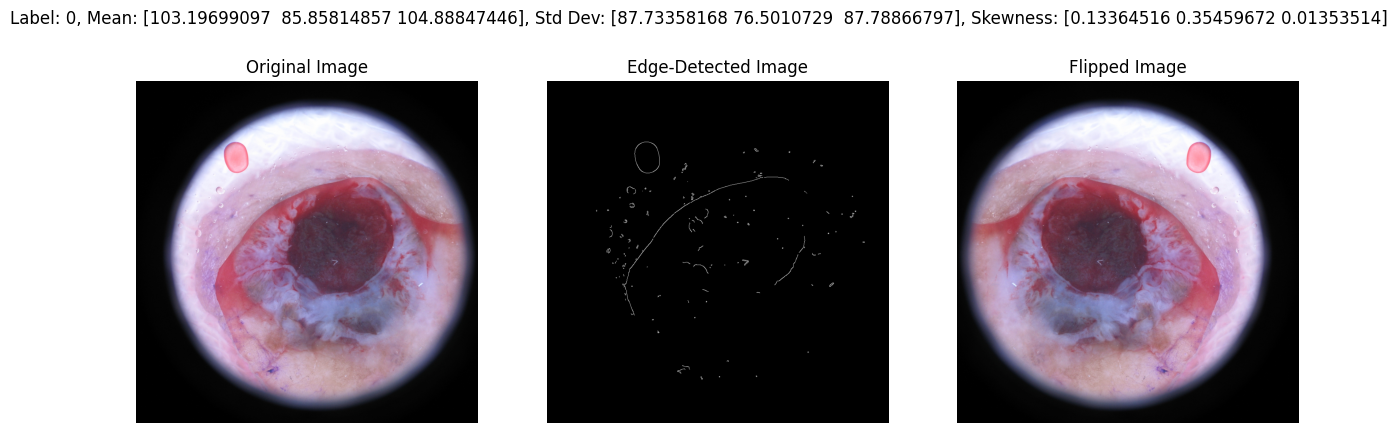

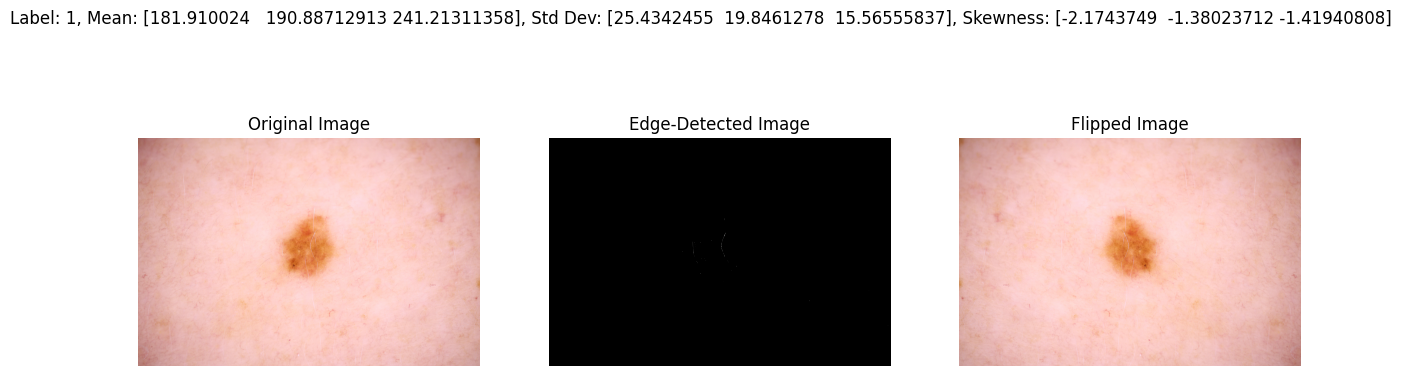

In [29]:
for index, row in df.sample(n=5).iterrows():  # Looping through a random sample of 5 images
    img_path = row['filename']
    label = row['label']
    
    # Reading image in color and grayscale
    img_color = cv2.imread(img_path)
    img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
    
    # Edge Detection
    edges = cv2.Canny(img_gray, 100, 200)
    
    # Basic Statistical Metrics
    mean = np.mean(img_color, axis=(0, 1))
    std_dev = np.std(img_color, axis=(0, 1))
    skewness = skew(img_color.reshape(-1, 3), axis=0)
    
    # Data Augmentation Preview (Flipping)
    img_flip = cv2.flip(img_color, 1)
    
    # Display the images and metrics
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')
    
    plt.subplot(1, 3, 2)
    plt.imshow(edges, cmap='gray')
    plt.title('Edge-Detected Image')
    plt.axis('off')
    
    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(img_flip, cv2.COLOR_BGR2RGB))
    plt.title('Flipped Image')
    plt.axis('off')
    
    plt.suptitle(f"Label: {label}, Mean: {mean}, Std Dev: {std_dev}, Skewness: {skewness}")
    plt.show()

# Color Space Transitions

In [31]:
img_mel = cv2.imread(mel_files[0])
img_nevus = cv2.imread(nevus_files[0])

In [34]:
# Convert to grayscale
gray_img = cv2.cvtColor(img_mel, cv2.COLOR_BGR2GRAY)

# Convert to HSV
hsv_img = cv2.cvtColor(img_mel, cv2.COLOR_BGR2HSV)

# Convert to LAB
lab_img = cv2.cvtColor(img_mel, cv2.COLOR_BGR2Lab)

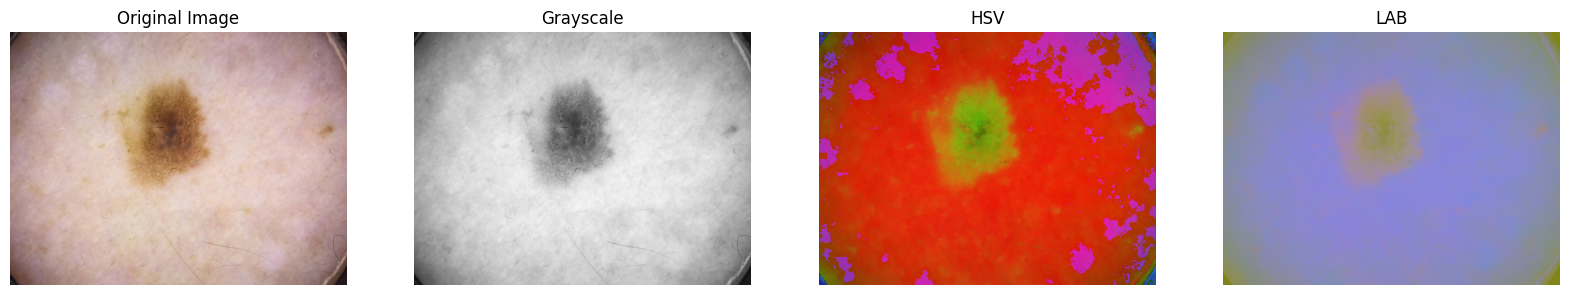

In [37]:
# Display the images in a single row
plt.figure(figsize=(20, 10))

plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(img_mel, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(gray_img, cmap='gray')
plt.title('Grayscale')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(cv2.cvtColor(hsv_img, cv2.COLOR_BGR2RGB))
plt.title('HSV')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(cv2.cvtColor(lab_img, cv2.COLOR_BGR2RGB))
plt.title('LAB')
plt.axis('off')


plt.show()

In [38]:
# Convert to grayscale
gray_img1 = cv2.cvtColor(img_nevus, cv2.COLOR_BGR2GRAY)

# Convert to HSV
hsv_img1 = cv2.cvtColor(img_nevus, cv2.COLOR_BGR2HSV)

# Convert to LAB
lab_img1 = cv2.cvtColor(img_nevus, cv2.COLOR_BGR2Lab)

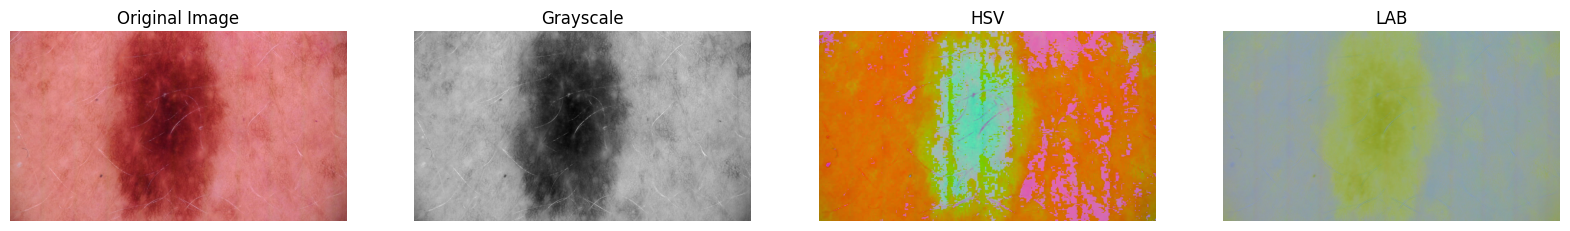

In [39]:
# Display the images in a single row
plt.figure(figsize=(20, 10))

plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(img_nevus, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(gray_img1, cmap='gray')
plt.title('Grayscale')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(cv2.cvtColor(hsv_img1, cv2.COLOR_BGR2RGB))
plt.title('HSV')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(cv2.cvtColor(lab_img1, cv2.COLOR_BGR2RGB))
plt.title('LAB')
plt.axis('off')


plt.show()

In [45]:
# Check for null values in the DataFrame
null_values = df.isnull().sum()

In [46]:
null_values

filename    0
label       0
dtype: int64

In [15]:
from tqdm import tqdm

In [49]:
# Initialize variables to hold sum of widths and heights
total_width = 0
total_height = 0
num_images = 0

# Loop through each image in the DataFrame
for img_path in tqdm(df['filename']):
    img = cv2.imread(img_path)
    h, w, _ = img.shape  # Get dimensions
    total_width += w
    total_height += h
    num_images += 1

# Calculate average dimensions
average_width = total_width / num_images
average_height = total_height / num_images


100%|█████████████████████████████████████| 11449/11449 [02:48<00:00, 67.92it/s]


In [50]:
print('Average Width - ',average_width)
print('Average Height - ',average_height)

Average Width -  2241.508253995982
Average Height -  1574.8673246571752


# PREPROCESSING

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
import cv2
import numpy as np
import os

In [7]:
# Split the data into train, validation, and test sets
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)
val_df, test_df = train_test_split(test_df, test_size=(0.3/0.4), random_state=42)

In [8]:
# Create directories to save preprocessed images
os.makedirs('train', exist_ok=True)
os.makedirs('val', exist_ok=True)
os.makedirs('test', exist_ok=True)

In [9]:
def crop_center(img, lesion_x, lesion_y, crop_size):
    h, w, _ = img.shape
    x1 = max(lesion_x - crop_size // 2, 0)
    x2 = min(lesion_x + crop_size // 2, w)
    y1 = max(lesion_y - crop_size // 2, 0)
    y2 = min(lesion_y + crop_size // 2, h)
    return img[y1:y2, x1:x2]

In [10]:
def resize_image(img, target_size):
    return cv2.resize(img, target_size, interpolation=cv2.INTER_LINEAR)

In [11]:
def augment_image(img):
    # Rotation
    angle = np.random.uniform(-30, 30)
    M_rot = cv2.getRotationMatrix2D((64, 64), angle, 1)
    
    # Scaling
    M_scale = np.array([[0.8, 0, 0], [0, 1.0, 0]], dtype=np.float32)
    
    # Translation
    dx, dy = np.random.uniform(-5, 5, 2)
    M_trans = np.array([[1, 0, dx], [0, 1, dy]], dtype=np.float32)
    
    # Apply transformations
    img = cv2.warpAffine(img, M_rot, (128, 128))
    img = cv2.warpAffine(img, M_scale, (128, 128))
    img = cv2.warpAffine(img, M_trans, (128, 128))
    
    return img

In [12]:
def preprocess_image(image_path, lesion_x, lesion_y):
    img = cv2.imread(image_path)
    crop_size = min(img.shape[0], img.shape[1])
    cropped_img = crop_center(img, lesion_x, lesion_y, crop_size)
    resized_img = resize_image(cropped_img, (128, 128))
    
    # Augmentation
    augmented_img = augment_image(resized_img)
    
    return augmented_img

In [16]:
def process_and_save(df, save_dir, augment=False):
    for idx, row in tqdm(df.iterrows()):
        image_path = row['filename']
        label = row['label']
        lesion_x, lesion_y = 250, 250  # Replace with actual lesion coordinates if available
        
        # Preprocess the image
        preprocessed_img = preprocess_image(image_path, lesion_x, lesion_y)
        
        # Augment the image if required
        if augment:
            preprocessed_img = augment_image(preprocessed_img)
        
        # Save the processed image
        save_path = os.path.join(save_dir, f"{idx}_{label}.jpg")
        cv2.imwrite(save_path, preprocessed_img)

In [17]:
# Apply preprocessing and augmentation to the training set
process_and_save(train_df, 'train', augment=True)

8014it [02:16, 58.52it/s]


In [18]:
# Apply only preprocessing to the validation and test sets
process_and_save(val_df, 'val')
process_and_save(test_df, 'test')

858it [00:13, 64.67it/s]
2577it [00:43, 59.42it/s]


# MODEL

In [19]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [20]:
class LCNet(nn.Module):
    def __init__(self):
        super(LCNet, self).__init__()
        
        # Initial Convolutional Layer
        self.conv1 = nn.Conv2d(3, 8, kernel_size=3, stride=2)
        
        # Block 1
        self.block1_conv1 = nn.Conv2d(8, 16, kernel_size=1, stride=1, padding=0) # padding added
        self.block1_bn1 = nn.BatchNorm2d(16)
        self.block1_conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1) # padding added
        self.block1_bn2 = nn.BatchNorm2d(32)

        # Block 2
        self.block2_conv = nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=1) # padding added
        self.block2_bn = nn.BatchNorm2d(32)

        # Block 3
        self.block3_conv = nn.Conv2d(64, 36, kernel_size=1, stride=1)  # Changed from 32 to 64
        self.block3_avg_pool = nn.AvgPool2d(2, 2)
        
        # Blocks 4-11 (repeated blocks)
        self.repeated_blocks = nn.ModuleList([
            nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1 if i % 2 == 0 else 3, stride=1),
                nn.BatchNorm2d(out_channels),
                nn.LeakyReLU(0.3)
            )
            for i, (in_channels, out_channels) in enumerate([
                (36, 32), (32, 64),  # Blocks 4, 5
                (64, 64), (64, 128), # Blocks 7, 8
                (128, 128), (128, 256) # Blocks 10, 11
            ])
        ])
        
        # Global Average Pooling
        self.global_avg_pool = nn.AdaptiveAvgPool2d((1, 1))
        
        # Fully Connected Layer
        self.fc = nn.Linear(256, 2)  # Assuming 2 classes for lesion classification

    def forward(self, x):
        x = self.conv1(x)
        
        # Block 1
        x1 = F.leaky_relu(self.block1_bn1(self.block1_conv1(x)), 0.3)
        x1 = F.leaky_relu(self.block1_bn2(self.block1_conv2(x1)), 0.3)
        
        # Block 2
        x2 = F.leaky_relu(self.block2_bn(self.block2_conv(x1)), 0.3)
        
        # Concatenation
        x = torch.cat((x1, x2), 1)
        
        # Block 3
        x = F.leaky_relu(self.block3_conv(x), 0.3)
        x = self.block3_avg_pool(x)
        
        # Repeated Blocks
        for block in self.repeated_blocks:
            x = block(x)
        
        # Global Average Pooling
        x = self.global_avg_pool(x)
        x = torch.flatten(x, 1)
        
        # Fully Connected Layer
        x = self.fc(x)
        
        return F.softmax(x, dim=1)

In [21]:
# Instantiate the model
model = LCNet()
print(model)

LCNet(
  (conv1): Conv2d(3, 8, kernel_size=(3, 3), stride=(2, 2))
  (block1_conv1): Conv2d(8, 16, kernel_size=(1, 1), stride=(1, 1))
  (block1_bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (block1_conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (block1_bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (block2_conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (block2_bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (block3_conv): Conv2d(64, 36, kernel_size=(1, 1), stride=(1, 1))
  (block3_avg_pool): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (repeated_blocks): ModuleList(
    (0): Sequential(
      (0): Conv2d(36, 32, kernel_size=(1, 1), stride=(1, 1))
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.3)
    )
    (1): Sequential(
     

In [22]:
import torch
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from PIL import Image
import os

In [23]:
class CustomDataset(Dataset):
    def __init__(self, dataframe, root_dir, transform=None):
        self.dataframe = dataframe
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_name = os.path.join(self.dataframe.iloc[idx, 0])
        image = Image.open(img_name).convert('RGB')
        label = int(self.dataframe.iloc[idx, 1])

        # Resize the image to a fixed size (e.g., 128x128)
        image = image.resize((128, 128))

        if self.transform:
            image = self.transform(image)

        return image, label


In [24]:
transform = {
    'train': transforms.Compose([
        transforms.ToTensor(),
    ]),
    'val': transforms.Compose([
        transforms.ToTensor(),
    ]),
    'test': transforms.Compose([
        transforms.ToTensor(),
    ])
}


In [25]:
train_dataset = CustomDataset(dataframe=train_df, root_dir='train', transform=transform['train'])
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

In [26]:
val_dataset = CustomDataset(dataframe=val_df, root_dir='val', transform=transform['val'])
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

In [27]:
test_dataset = CustomDataset(dataframe=test_df, root_dir='test', transform=transform['test'])
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [28]:
# Initialize the LCNet model (defined in your code)
model = LCNet()

# Set hyperparameters
learning_rate = 0.001
batch_size = 32
epochs = 10
momentum = 0.99
regularization = 0.0005

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum, weight_decay=regularization)


In [29]:
# Training Loop
for epoch in range(epochs):
    model.train()
    
    # Training
    for i, (images, labels) in tqdm(enumerate(train_loader)):
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    # Validation
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in val_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}, Validation Accuracy: {100 * correct / total}%")

251it [09:54,  2.37s/it]


Epoch [1/10], Loss: 0.3898, Validation Accuracy: 79.72027972027972%


251it [09:46,  2.34s/it]


Epoch [2/10], Loss: 0.5041, Validation Accuracy: 84.73193473193473%


251it [09:39,  2.31s/it]


Epoch [3/10], Loss: 0.4293, Validation Accuracy: 84.4988344988345%


251it [09:35,  2.29s/it]


Epoch [4/10], Loss: 0.4319, Validation Accuracy: 86.7132867132867%


251it [09:31,  2.28s/it]


Epoch [5/10], Loss: 0.3371, Validation Accuracy: 87.06293706293707%


251it [09:27,  2.26s/it]


Epoch [6/10], Loss: 0.4489, Validation Accuracy: 85.54778554778555%


251it [09:30,  2.27s/it]


Epoch [7/10], Loss: 0.4548, Validation Accuracy: 85.8974358974359%


251it [09:25,  2.25s/it]


Epoch [8/10], Loss: 0.3989, Validation Accuracy: 85.78088578088578%


251it [09:28,  2.26s/it]


Epoch [9/10], Loss: 0.4666, Validation Accuracy: 83.44988344988344%


251it [09:24,  2.25s/it]


Epoch [10/10], Loss: 0.3815, Validation Accuracy: 87.2960372960373%


In [34]:
# Initialize variables to store results
true_labels = []
pred_labels = []

In [35]:
from sklearn.metrics import f1_score, precision_score, recall_score

In [36]:
# Set the model to evaluation mode
model.eval()

# Loop over test data
with torch.no_grad():
    for images, labels in tqdm(test_loader):
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        
        true_labels.extend(labels.cpu().numpy())
        pred_labels.extend(predicted.cpu().numpy())

100%|███████████████████████████████████████████| 81/81 [02:30<00:00,  1.86s/it]


In [37]:
# Compute metrics
f1 = f1_score(true_labels, pred_labels, average='macro')  # average can also be: 'micro', 'weighted'
precision = precision_score(true_labels, pred_labels, average='macro')  # average can also be: 'micro', 'weighted'
recall = recall_score(true_labels, pred_labels, average='macro')  # average can also be: 'micro', 'weighted'

print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

F1 Score: 0.870664170078147
Precision: 0.8699853893726146
Recall: 0.871670278197299
